## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing Libraries and Data
#### 2. The Elbow Technique
#### 3. K-Means Clustering

### 1. Importing Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [115]:
df_6 = pd.read_csv('/Users/selcenayranci/Desktop/2023 NYC Airbnb Analysis/02.Data/Prepared Data/airbnb_2023_v4.csv')

In [116]:
df_6.columns

Index(['ID', 'Name', 'Neighbourhood Group', 'Neighbourhood', 'Latitude',
       'Longitude', 'Room Type', 'Price', 'Min Nights', 'No of Reviews',
       'Last Review', 'Reviews Per Month', 'Calculated Host Listings',
       'Availability', 'No of Reviews LTM', 'Neighbourhood Group Code',
       'Room Type Code'],
      dtype='object')

In [117]:
df_6_subset = df_6[['Latitude', 'Longitude', 'Price', 'Min Nights', 'No of Reviews', 
                    'Reviews Per Month', 'Reviews Per Month', 'Calculated Host Listings', 
                    'Availability', 'Neighbourhood Group Code', 'Room Type Code']]

### 2. The Elbow Technique

In [118]:
# Defining the range of potential clusters in the data
num_cl = range(1, 10) 

# Defining k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [119]:
# Creating a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_6_subset).score(df_6_subset) for i in range(len(kmeans))] 

score

[-6284105604.2202635,
 -5391671222.8272295,
 -2916208329.987404,
 -1766482947.7846406,
 -1427769328.2217972,
 -1148481592.7843187,
 -972797179.7242173,
 -896659282.7461716,
 -746659502.8723763]

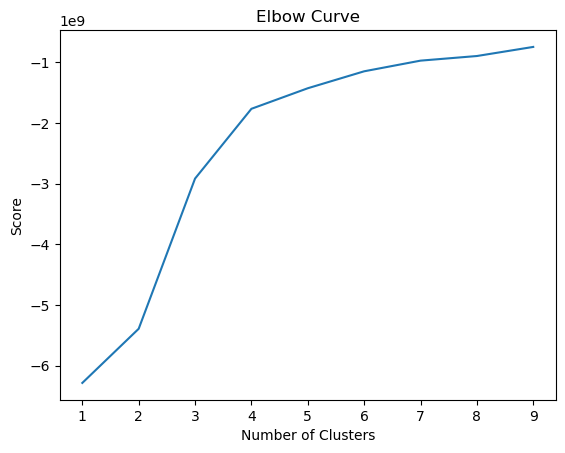

In [120]:
# Plotting the elbow curv

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a sharp jump from 1 to 2, then to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count for my clusters is 4.

#### 3. K-Means Clustering

In [84]:
# Creating the k-means object

kmeans = KMeans(n_clusters = 4) 

In [85]:
# Fitting the k-means object to the data

kmeans.fit(df_6_subset)

KMeans(n_clusters=4)

In [86]:
df_6_subset['Clusters'] = kmeans.fit_predict(df_6_subset)

In [87]:
df_6_subset.head()

,Price,Min Nights,No of Reviews,Latitude,Longitude,Reviews Per Month,Calculated Host Listings,Availability,Neighbourhood Group Code,Room Type Code,Clusters
0,150,30,49,40.75356,-73.98559,0.30,3,314,1,1,0
1,60,30,50,40.68535,-73.95512,0.30,2,365,2,2,0
2,75,2,118,40.80380,-73.96751,0.72,1,0,1,2,3
3,68,2,575,40.76457,-73.98317,3.41,1,106,1,2,3
4,275,60,3,40.66265,-73.99454,0.03,1,181,2,1,0


In [88]:
df_6_subset['Clusters'].value_counts()

Clusters
3    25146
0    16625
1     1099
2       49
Name: count, dtype: int64

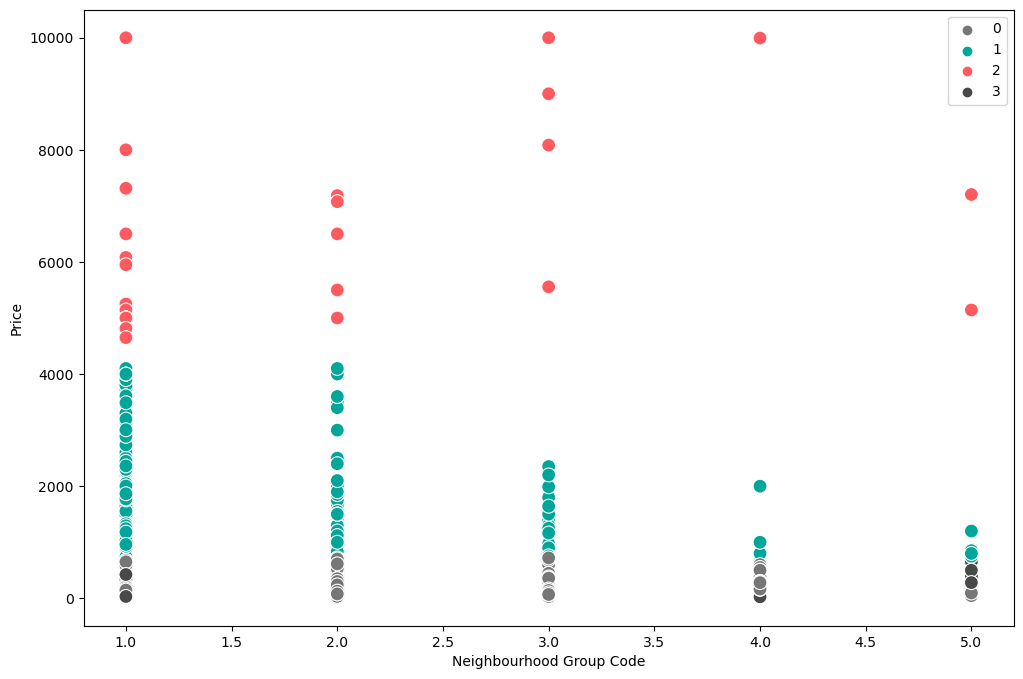

In [95]:
# Plotting the clusters for the 'Price' and 'Neighbourhood Group Code' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_6_subset['Neighbourhood Group Code'], y=df_6_subset['Price'], 
                     hue=kmeans.labels_, palette={0:'#767676', 1:'#00A699', 2:'#FF5A5F', 3:'#484848'}, s=100) 
ax.grid(False)
plt.xlabel('Neighbourhood Group Code') 
plt.ylabel('Price')
plt.show()

1 = Manhattan 2 = Brooklyn 3 = Queens 4 = The Bronx 5 = Staten Island

The cluster at the very top in red (legend code 2) gathers the data points with the highest prices of listings in all the neighbourhoods that are over $4000 per night. The data points are the most populated in Manhattan. Bronx and Staten Island seems to have very few listings in this cluster. 

The third and fourth cluster, in gray and black color (legend code 0 and 3), contains the points with the lowest prices in all areas that are less than $1000.

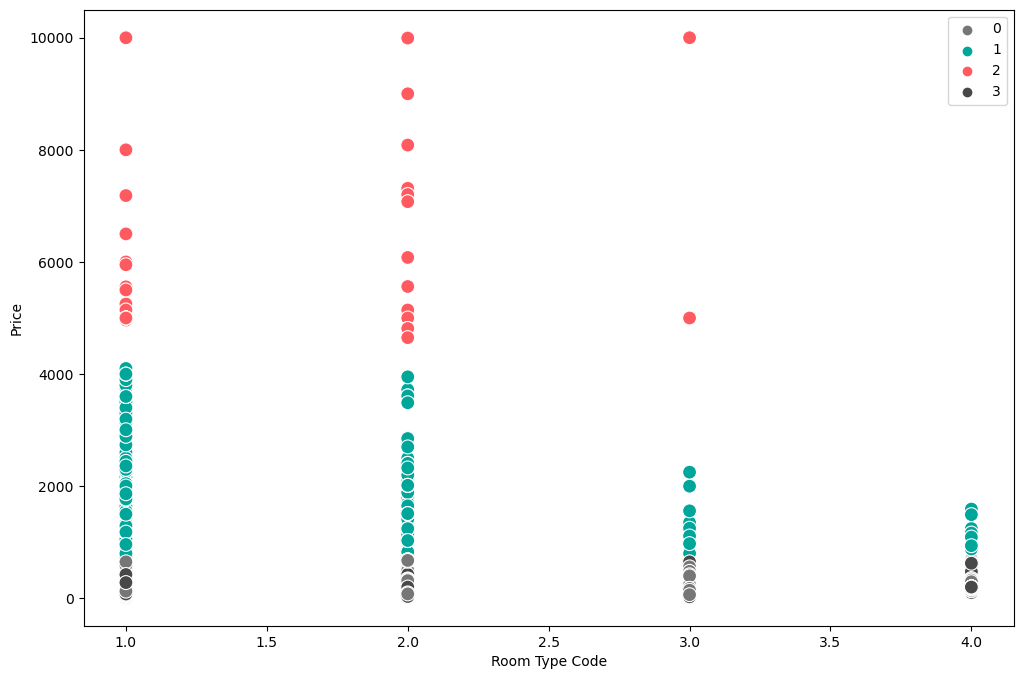

In [96]:
# Plotting the clusters for the 'Price' and 'Room Type Code' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_6_subset['Room Type Code'], y=df_6_subset['Price'], 
                     hue=kmeans.labels_, palette={0:'#767676', 1:'#00A699', 2:'#FF5A5F', 3:'#484848'}, s=100) 
ax.grid(False)
plt.xlabel('Room Type Code') 
plt.ylabel('Price')
plt.show()

1 = Entire home/apt 2 = Private room 3 = Shared room 4 = Hotel room

The cluster at the very top in red (legend code 2) gathers the data points with the highest prices of room types that are over $4000 per night. The data points are the most populated almost exclusively by entire home/apts and private rooms.

The second cluster in green (legend code 1), includes points with the mid range prices for room types that are cheaper than the first cluster, rangeing from 1000 to $4000 which again populated by entire home/apts and private rooms. 

The third and fourth cluster, in gray and black color (legend code 0 and 3), contains the points with the lowest prices for all the room types that are less than $1000. 

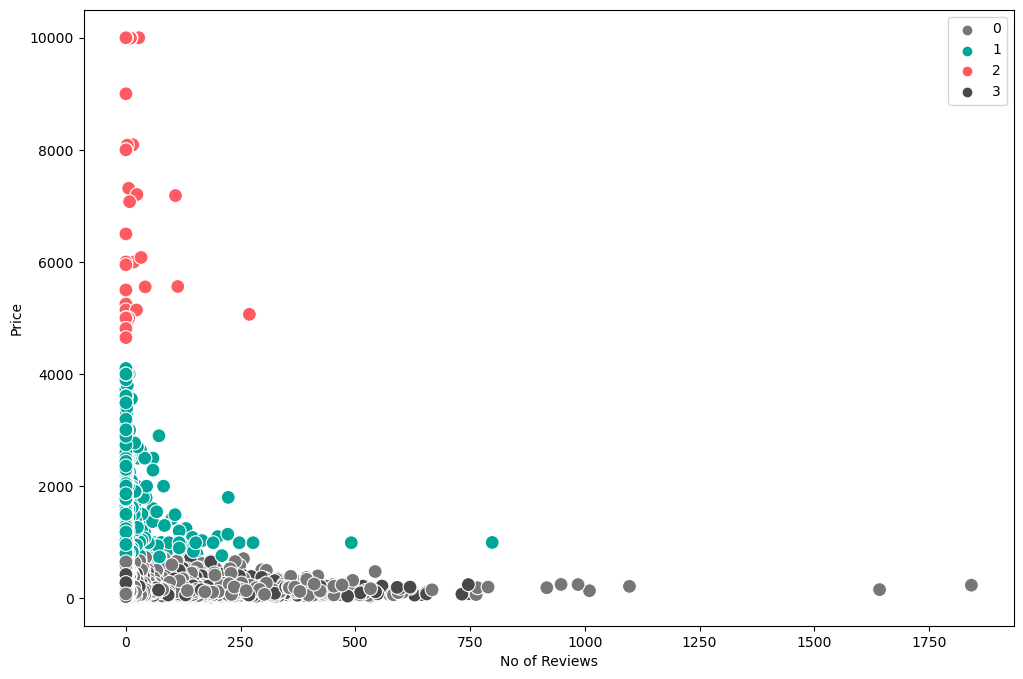

In [97]:
# Plotting the clusters for the 'Price' and 'No of Reviews' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_6_subset['No of Reviews'], y=df_6_subset['Price'], 
                     hue=kmeans.labels_, palette={0:'#767676', 1:'#00A699', 2:'#FF5A5F', 3:'#484848'}, s=100) 
ax.grid(False)
plt.xlabel('No of Reviews') 
plt.ylabel('Price')
plt.show()

For the top red cluster of points (legend code 2), we can see that none of the most expensive listings have highest reviews.

Conversely, in the gray cluster (legend code 0), we can see that all the listings that have the highest amount of reviews are some of the cheapest listings. 

We can say that it is more likely for a cheaper accomodation to get more reviews.

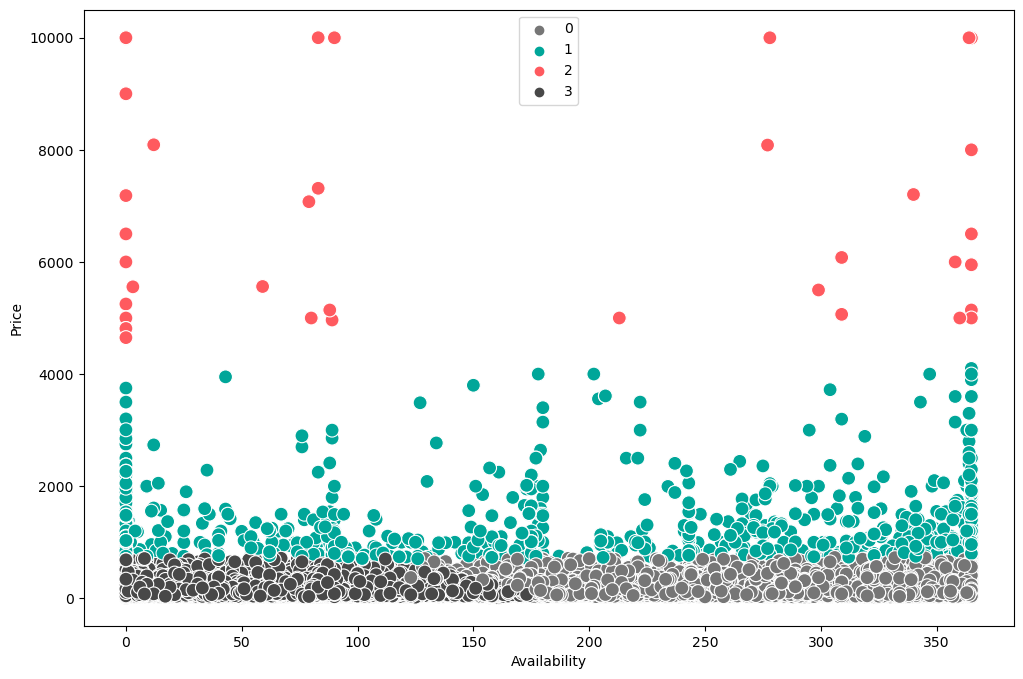

In [98]:
# Plotting the clusters for the 'Price' and 'Availability' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_6_subset['Availability'], y=df_6_subset['Price'], 
                     hue=kmeans.labels_, palette={0:'#767676', 1:'#00A699', 2:'#FF5A5F', 3:'#484848'}, s=100) 
ax.grid(False)
plt.xlabel('Availability') 
plt.ylabel('Price')
plt.show()

In the red cluster of points (legend code 2), we can see that most expensive listings has either availability less than 100 days or more than 200 days per year.

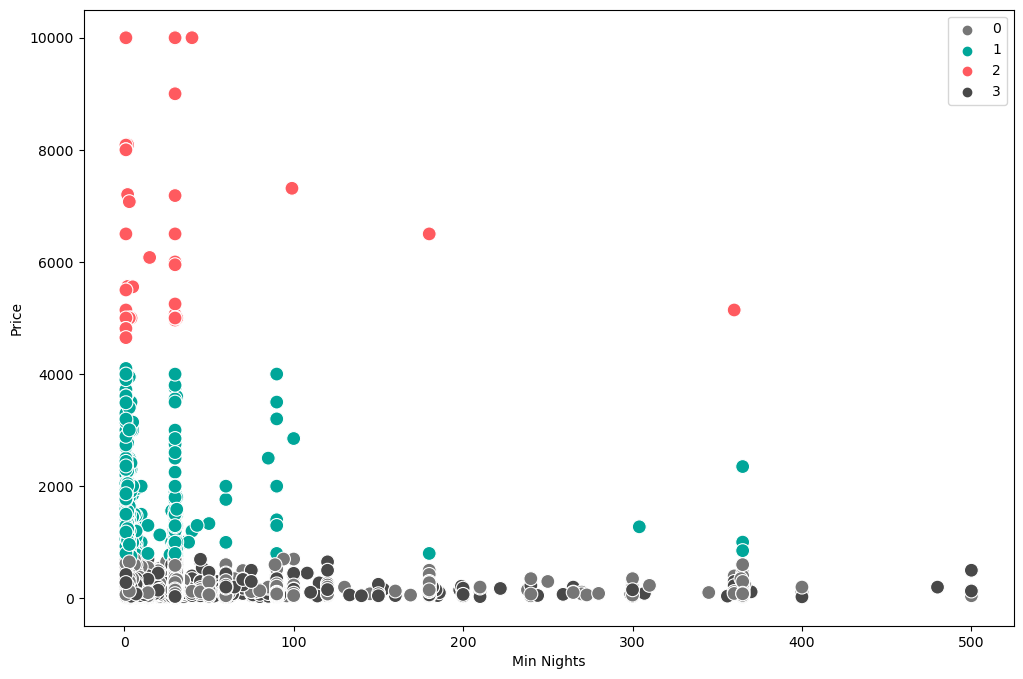

In [99]:
# Plotting the clusters for the 'Price' and 'Min Nights' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_6_subset['Min Nights'], y=df_6_subset['Price'], 
                     hue=kmeans.labels_, palette={0:'#767676', 1:'#00A699', 2:'#FF5A5F', 3:'#484848'}, s=100) 
ax.grid(False)
plt.xlabel('Min Nights') 
plt.ylabel('Price')
plt.show()

The cluster at the very top in red (legend code 2) gathers the data points with the highest prices for the required min stay. Except few points, the most expensive accomodations require less than 50 days as min stay.

The third and fourth cluster, in gray and black color (legend code 0 and 3), contains the points with the lowest prices and offer the most variety of required min stay but contrary to the pink cluster, rose clusters require some of the longest min stay.

In [100]:
df_6_subset.loc[df_6_subset['Clusters'] == 0, 'Cluster'] = 'gray'
df_6_subset.loc[df_6_subset['Clusters'] == 1, 'Cluster'] = 'green'
df_6_subset.loc[df_6_subset['Clusters'] == 2, 'Cluster'] = 'red'
df_6_subset.loc[df_6_subset['Clusters'] == 3, 'Cluster'] = 'black'

In [101]:
df_6_subset.groupby('Cluster').agg({'Neighbourhood Group Code':['mean', 'median'],
                                    'Room Type Code':['mean', 'median'],
                                    'No of Reviews':['mean', 'median'],
                                    'Availability':['mean', 'median'],
                                    'Min Nights':['mean', 'median'],
                                    'Price':['mean', 'median']})

Neighbourhood Group Code        Room Type Code        No of Reviews  \
                            mean median           mean median          mean   
Cluster                                                                       
black                   1.810666    2.0       1.472839    1.0     24.677881   
gray                    1.970346    2.0       1.443008    1.0     28.653053   
green                   1.274795    1.0       1.304823    1.0     11.145587   
red                     1.673469    1.0       1.510204    1.0     15.183673   

               Availability        Min Nights               Price          
        median         mean median       mean median         mean  median  
Cluster                                                                    
black      5.0    32.829277    0.0  19.412670   30.0   143.839418   115.0  
gray       5.0   299.365534  321.0  16.219248    4.0   170.804511   134.0  
green      0.0   190.401274  207.0  11.717015    2.0  1276.797088  1028.0  
red        1.0   166.387755   88.0  29.571429   30.0  7243.265306  6500.0

Neighbourhood Group:
- Most entries in the clusters 'green' and 'red' are from Manhattan.
- For 'black' and 'gray', the median is 2.0, indicating a significant presence of Brooklyn in this cluster.

Room Types:
- All clusters have predominantly Entire home/apts.

No of Reviews:
- Clusters 'green' have many listings with few to no reviews.
- Clusters 'black' and 'gray' has the highest number of reviews showing more engagement.

Availability:
- Clusters 'gray' and 'green' show high availability throughout the year meaning these listings are available for the majority of the year.
- Cluster 'red' has a significant difference between mean and median which could mean that some listings with very high availability skewing the average.
- Cluster 'black' has the lowest availability

Min Nights:
- Cluster 'black' and 'red' have high median minimum nights, suggesting longer stay requirements.
- Cluster 'green' has a low median minimum night requirement, indicating more flexibility for short stays.

Price:
- Cluster 'red' has the highest mean and median prices, indicating premium or luxury listings.
- Cluster 'green' also shows high prices but significantly lower than red cluster.
- Cluster 'black' and 'gray' have relatively lower prices, with 'black' cluster being the most affordable.

In [102]:
df_6_subset.to_csv('/Users/selcenayranci/Desktop/2023 NYC Airbnb Analysis/02.Data/Prepared Data/airbnb_2023_v6.csv', index=False)